In [108]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
data_df = pd.read_csv("brewers_association_data_with_tax_data.csv")
data_df.head()

,Unnamed: 0,STATE,ZIP Code,NUMBER OF RETURNS,NUMBER OF RETURNS WITH TOTAL INCOME,TOTAL INCOME AMOUNT,NUMBER OF RETURNS WITH SALARIES AND WAGES,SALARIES AND WAGES AMOUNT,Brewery,Address,City,State
0,0,AL,35004.0,5210.0,5210.0,290260.0,4550.0,234833.0,NaN,NaN,NaN,NaN
1,1,AL,35005.0,3100.0,3100.0,121690.0,2660.0,98565.0,NaN,NaN,NaN,NaN
2,2,AL,35006.0,1200.0,1200.0,57418.0,1040.0,43707.0,NaN,NaN,NaN,NaN
3,3,AL,35007.0,11940.0,11940.0,697882.0,10180.0,545418.0,siluria brewing company,145 1st ave w,Alabaster,AL
4,4,AL,35010.0,7910.0,7910.0,384319.0,6700.0,266658.0,NaN,NaN,NaN,NaN


In [109]:
# get the number of breweries by zipcode
brew_by_zipcode = data_df.groupby(["ZIP Code"], as_index=False).count()

# get a feel for typical numbers of breweries per zipcode
num_zip_0_brews = brew_by_zipcode["Brewery"].value_counts()

In [110]:
# get a df that produces the total count of breweries by state
brew_by_state = data_df.groupby(["STATE"], as_index=False).count()
brew_by_state.head()

,STATE,Unnamed: 0,ZIP Code,NUMBER OF RETURNS,NUMBER OF RETURNS WITH TOTAL INCOME,TOTAL INCOME AMOUNT,NUMBER OF RETURNS WITH SALARIES AND WAGES,SALARIES AND WAGES AMOUNT,Brewery,Address,City,State
0,AK,168,168,168,168,168,168,168,41,41,41,41
1,AL,609,609,609,609,609,609,609,42,41,42,42
2,AR,523,523,523,523,523,523,523,38,38,38,38
3,AZ,426,426,426,426,426,426,426,117,117,117,117
4,CA,2016,2016,2016,2016,2016,2016,2016,841,841,841,841


In [111]:
# calculate percentages of number of breweries by zipcodes
percents_of_total_num_breweries = []
for x in range(len(num_zip_0_brews)):
    percents_of_total_num_breweries.append(len(brew_by_zipcode.loc[brew_by_zipcode["Brewery"] == x, :]) / len(data_df))

In [112]:
# linear regression NOT RIGHT NOT AVERAGES
# avg_income_by_zip = data_df.groupby(["ZIP Code"], as_index=False).mean()
# avg_inc_by_zip = avg_income_by_zip.iloc[:, 4]
# num_breweries_by_zip = brew_by_zipcode.iloc[:, 8]
# ai_slope, ai_int, ai_r, ai_p, ai_std_err = stats.linregress(avg_inc_by_zip, num_breweries_by_zip)
# ai_fit = ai_slope * avg_inc_by_zip + ai_int

# fig, ax1 = plt.subplots()
# fig.suptitle("Breweries by Avg Income Per Zipcode", fontsize=16, fontweight="bold")

# ax1.set_xlim(min(avg_inc_by_zip), max(avg_inc_by_zip))
# ax1.plot(avg_inc_by_zip, num_breweries_by_zip, linewidth=0, marker="o")
# ax1.plot(avg_inc_by_zip, ai_fit, "b--", linewidth=1)
# ax1.set_ylabel("Number of Breweries")

In [113]:
# linear regression NOT RIGHT AVERAGES
# avg_income_only_zip_w_brews = non_nan_data.groupby(["ZIP Code"], as_index=False).mean()
# count_brews_only_zip_w_brews = non_nan_data.groupby(["ZIP Code"], as_index=False).count()
# avg_inc_by_zip_2 = avg_income_only_zip_w_brews.iloc[:, 4]
# num_breweries_by_zip_2 = count_brews_only_zip_w_brews.iloc[:, 8]
# ai_slope_2, ai_int_2, ai_r_2, ai_p_2, ai_std_err_2 = stats.linregress(avg_inc_by_zip_2, num_breweries_by_zip_2)
# ai_fit_2 = ai_slope_2 * avg_inc_by_zip_2 + ai_int_2

# fig, ax2 = plt.subplots()
# fig.suptitle("Breweries by Avg Income Per Zipcode with a Brewery", fontsize=16, fontweight="bold")

# ax2.set_xlim(min(avg_inc_by_zip_2), max(avg_inc_by_zip_2))
# ax2.plot(avg_inc_by_zip_2, num_breweries_by_zip_2, linewidth=0, marker="o")
# ax2.plot(avg_inc_by_zip_2, ai_fit_2, "b--", linewidth=1)
# ax2.set_ylabel("Number of Breweries")
# fig.savefig("Breweries by Avg Income Per Zipcode with a Brewery")
# print(ai_r_2, ai_p_2, ai_std_err_2)

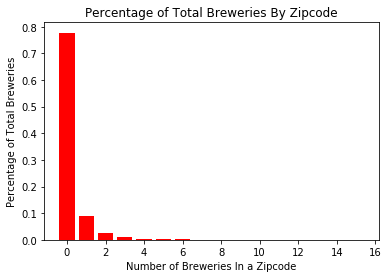

In [114]:
# plot the percentages of total breweries by the number of breweries in a zipcode
plt.bar(range(len(num_zip_0_brews)), percents_of_total_num_breweries, color="r", align="center")
plt.title("Percentage of Total Breweries By Zipcode")
plt.xlabel("Number of Breweries In a Zipcode")
plt.ylabel("Percentage of Total Breweries")
plt.savefig("percentage_of_total_breweries_by_zipcode")
plt.show()

In [115]:
# list_un_states = data_df["STATE"].unique().tolist()
# new_list = list_un_states.sort(reverse=False)
# breweries_by_state = brew_by_state.loc[:,"Brewery"]
# count_brews_by_state = breweries_by_state.tolist()
# states_by_breweries = brew_by_state.loc[:,"STATE"]
# state_by_count_brews = states_by_breweries.tolist()

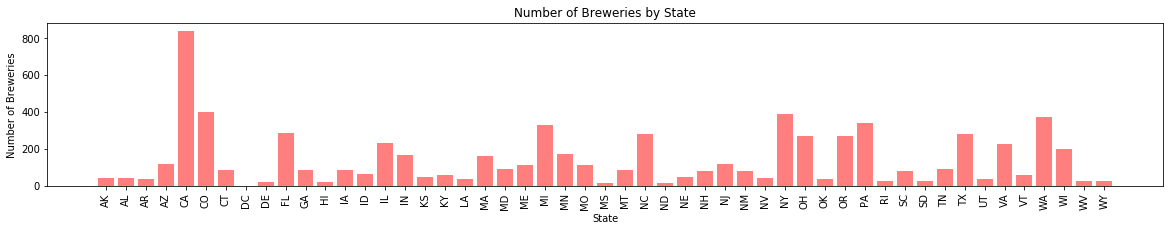

In [116]:
# Count of Breweries by State
x_axis = np.arange(len(brew_by_state))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, brew_by_state["Brewery"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, brew_by_state["STATE"], rotation="vertical")
plt.title("Number of Breweries by State")
plt.xlabel("State")
plt.ylabel("Number of Breweries")
plt.savefig("total_breweries_by_state.png")
plt.show()

In [117]:
# Avg Total Income by State - NOT RIGHT CUZ MULTIPLE ENTRIES PER ZIP
# avg_income_by_state = data_df.groupby(["STATE"], as_index=False).mean()
# x_axis = np.arange(len(avg_income_by_state))
# tick_locations = [value for value in x_axis]
# plt.figure(figsize=(20,3))
# plt.bar(x_axis, avg_income_by_state["TOTAL INCOME AMOUNT"], color='r', alpha=0.5, align="center")
# plt.xticks(tick_locations, avg_income_by_state["STATE"], rotation="vertical")
# plt.title("Average Income by State")
# plt.xlabel("State")
# plt.ylabel("Average Income")
# plt.savefig("avg_income_by_state_not_right.png")
# plt.show()

In [118]:
# make df with only zipcodes that contain a brewery and sort it by total income levels
non_nan_data = data_df.dropna()
non_nan_zip_total_income = non_nan_data
non_nan_zip_total_income.sort_values("TOTAL INCOME AMOUNT")

# create income level bins
bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000]
labels = ["0-1mil", "1-2mil", "2-3mil", "3-4mil", "4-5mil", "5-6mil", "6-7mil", "7-8mil"]

# add a column of income levels categorise to our df of only zipcodes that contain a brewery
non_nan_zip_total_income["Income Levels"] = pd.cut(non_nan_zip_total_income["TOTAL INCOME AMOUNT"], bins, labels=labels)

# create a df that groups by zipcode and provides the total number of breweries per zipcode
groupbed_by_income_level_count = non_nan_zip_total_income.groupby("Income Levels").count()

# create a df that groups by zipcode and provides the total income reported per zipcode
groupbed_by_income_level_max = non_nan_zip_total_income.groupby("Income Levels").max()

non_nan_zip_total_income.head()

C:\Users\Lauren Drew\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Unnamed: 0,STATE,ZIP Code,NUMBER OF RETURNS,NUMBER OF RETURNS WITH TOTAL INCOME,TOTAL INCOME AMOUNT,NUMBER OF RETURNS WITH SALARIES AND WAGES,SALARIES AND WAGES AMOUNT,Brewery,Address,City,State,Income Levels
3,3,AL,35007.0,11940.0,11940.0,697882.0,10180.0,545418.0,siluria brewing company,145 1st ave w,Alabaster,AL,0-1mil
25,25,AL,35055.0,7950.0,7950.0,415554.0,6610.0,297425.0,goat island brewing,1646 a john h cooper drive,Cullman,AL,0-1mil
79,79,AL,35173.0,12710.0,12710.0,1060223.0,10610.0,773258.0,slag heap brewing company,227 main st,Trussville,AL,1-2mil
95,95,AL,35209.0,11970.0,11970.0,1315379.0,10180.0,729711.0,the grocery brewpub,2823 central ave ste 107,Birmingham,AL,1-2mil
106,106,AL,35222.0,3760.0,3760.0,326400.0,3220.0,225474.0,avondale brewing co,201 41st st s,Birmingham,AL,0-1mil


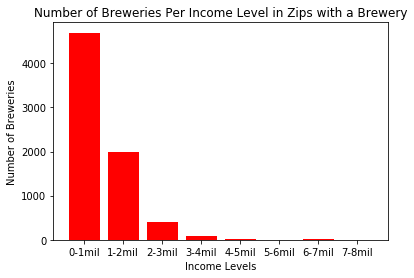

In [119]:
# plot the number of breweries per zips within certain income levels
plt.bar(range(len(groupbed_by_income_level_count)), groupbed_by_income_level_count["Brewery"], color="r", align="center")
plt.title("Number of Breweries Per Income Level in Zips with a Brewery")
plt.xlabel("Income Levels")
plt.ylabel("Number of Breweries")
plt.xticks(range(8), labels)
plt.savefig("Number of Breweries per Income Level")
plt.show()

In [120]:
# select only zipcodes with breweries, where the income level is within bin 0-1mil
low_income = non_nan_zip_total_income.loc[non_nan_zip_total_income["Income Levels"] == "0-1mil", :]

# number of unique breweries per zipcode in zipcodes where total income is 0-1 mil
low_income_groupbedby_zip_count = low_income.groupby("ZIP Code").count()

# total income per zipcode where income level is 0-1 mil
low_income_groupbedby_zip_max = low_income.groupby("ZIP Code").max()

# append df with number of unique brewers per zipcode in zipcodes where total is 0-1 mil, with the income for that zip
total_income_for_zips_low_income = low_income_groupbedby_zip_max["TOTAL INCOME AMOUNT"]
low_income_groupbedby_zip_count["Total Income"] = total_income_for_zips_low_income

# sort the df by total reported income per zip
sorted_df = low_income_groupbedby_zip_count.sort_values("Total Income")
sorted_df.head()

,Unnamed: 0,STATE,NUMBER OF RETURNS,NUMBER OF RETURNS WITH TOTAL INCOME,TOTAL INCOME AMOUNT,NUMBER OF RETURNS WITH SALARIES AND WAGES,SALARIES AND WAGES AMOUNT,Brewery,Address,City,State,Income Levels,Total Income
ZIP Code,,,,,,,,,,,,,
65729.0,1,1,1,1,1,1,1,1,1,1,1,1,4055.0
76937.0,1,1,1,1,1,1,1,1,1,1,1,1,4067.0
97750.0,1,1,1,1,1,1,1,1,1,1,1,1,4536.0
87531.0,1,1,1,1,1,1,1,1,1,1,1,1,4762.0
68416.0,1,1,1,1,1,1,1,1,1,1,1,1,4798.0


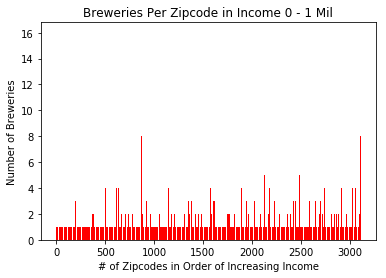

In [121]:
# plot the number of breweries per zipcode in zipcodes where the total reported income was between 0 and 1 mil
plt.bar(range(len(sorted_df)), sorted_df["Brewery"], color="r", align="center")
plt.title("Breweries Per Zipcode in Income 0 - 1 Mil")
plt.xlabel("# of Zipcodes in Order of Increasing Income")
plt.ylabel("Number of Breweries")
plt.savefig("brewers in income bracket $0 to 1 million")
plt.show()

0.18269487512197724 9.371825739959624e-25 6.892148195268053e-08


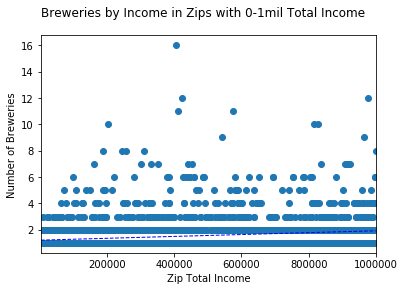

In [122]:
# get number of unique breweries per zipcode in this income level
num_b = sorted_df.iloc[:, 7]

# get total income for zipcodes in this income level
t_income = sorted_df.iloc[:, 12]

# set up linear regression
ti_slope, ti_int, ti_r, ti_p, ti_std_err = stats.linregress(t_income, num_b)
ti_fit = ti_slope * t_income + ti_int

# plot the linear regression
fig, ax3 = plt.subplots()
fig.suptitle("Breweries by Income in Zips with 0-1mil Total Income", fontsize=12)

ax3.set_xlim(min(t_income), max(t_income))
ax3.plot(t_income, num_b, linewidth=0, marker="o")
ax3.plot(t_income, ti_fit, "b--", linewidth=1)
ax3.set_ylabel("Number of Breweries")
ax3.set_xlabel("Zip Total Income")
fig.savefig("Breweries by Income Per Zipcode with 0-1 Mil Total Income")
print(ti_r, ti_p, ti_std_err)